# First assignment: Compute different measures on a realistic graph

In [2]:
import numpy as np
import urllib.request as urllib
import io
import zipfile

import networkx as nx
import matplotlib.pyplot as plt
import scipy
import collections

## Load dataset

In [3]:
'''
url = "http://nrvis.com/download/data/inf/inf-openflights.zip"

sock = urllib.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("readme.html").decode()  # read info file
edges = zf.read("inf-openflights.edges").decode()  # read edges data

# split each row
edges = edges.split("\n")


# create graph
G = nx.Graph()


for row in edges:
    if len(row.split(" ")) == 1:
        continue

    print(row.split(" "))
    source, target = row.split(" ")
    source = int(source)
    target = int(target)

    # add nodes if not in yet
    if source not in G:
        G.add_node(source)
        
    if target not in G:
        G.add_node(target)
        
    # add edge and weight
    G.add_edge(source, target)
        
        
'''

'\nurl = "http://nrvis.com/download/data/inf/inf-openflights.zip"\n\nsock = urllib.urlopen(url)  # open URL\ns = io.BytesIO(sock.read())  # read into BytesIO "file"\nsock.close()\n\nzf = zipfile.ZipFile(s)  # zipfile object\ntxt = zf.read("readme.html").decode()  # read info file\nedges = zf.read("inf-openflights.edges").decode()  # read edges data\n\n# split each row\nedges = edges.split("\n")\n\n\n# create graph\nG = nx.Graph()\n\n\nfor row in edges:\n    if len(row.split(" ")) == 1:\n        continue\n\n    print(row.split(" "))\n    source, target = row.split(" ")\n    source = int(source)\n    target = int(target)\n\n    # add nodes if not in yet\n    if source not in G:\n        G.add_node(source)\n        \n    if target not in G:\n        G.add_node(target)\n        \n    # add edge and weight\n    G.add_edge(source, target)\n        \n        \n'

In [4]:
# create graph
G = nx.Graph()

with open("dataset/facebook_combined.edges") as edges:
    for row in edges:
        if len(row.split(" ")) == 1:
            continue
        
        source, target = row.split(" ")[:2]
        source = int(source)
        target = int(target)

        # add nodes if not in yet
        if source not in G:
            G.add_node(source)
        
        if target not in G:
            G.add_node(target)
        
        # add edge and weight
        G.add_edge(source, target)

In [6]:
# number of nodes
print("Number of nodes: ", nx.number_of_nodes(G))

# number of links
print("Number of edges: ", nx.number_of_edges(G))


Number of nodes:  4039
Number of edges:  88234


KeyboardInterrupt: 

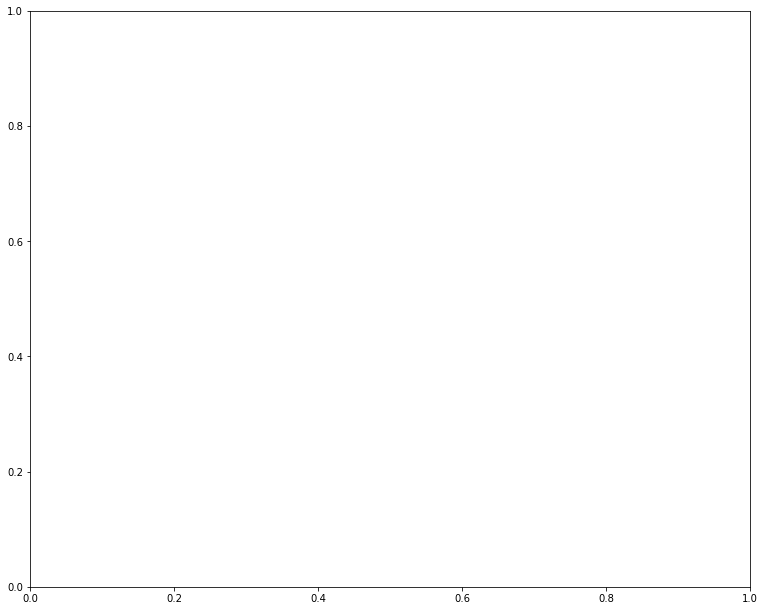

In [7]:
# draw
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True)
plt.show()

# poi con quello reale bisogna usare Gephi

### Compute metrics

#### Find the largest connected component if necessary

In [9]:
if not nx.is_connected(G):
    print("graph not connected! From now on the largest component will be considered as the graph")  
    #G =  G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0]).copy()
    
print("Number of nodes of the giant component: ", nx.number_of_nodes(G))


# o bisogna considerare tutte le componenti in qualche modo? da chiedere

Number of nodes of the giant component:  4039


#### 1.Does the graph have the same characteristics of a random or a power-law network?

In [10]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

def nth_moment(g,n):
    s = 0
    for node in g.nodes:
        s += g.degree[node] ** n
    return (s/len(g))

def nth_moment_v2(g,n):
    degree_np = np.array(list(dict(g.degree).values()))
    return (sum(degree_np**n)/len(g))

<ipython-input-10-6574cbca94d4>:4: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


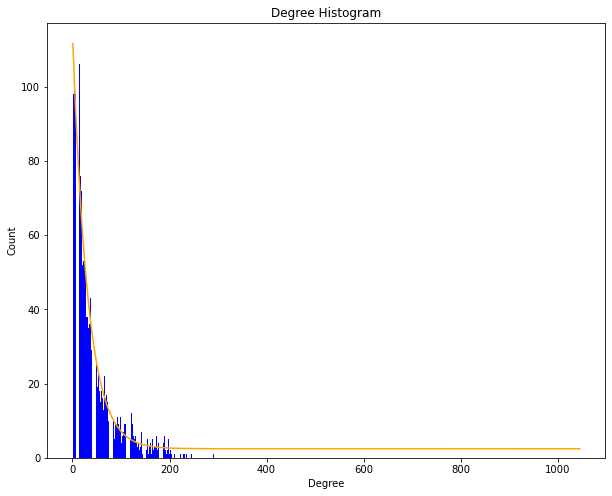

In [15]:
plt.figure(figsize=(10, 8))

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

#fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_xticks([d for d in deg])
#ax.set_xticklabels(deg)

popt, pcov = curve_fit(func, np.array(deg), np.array(cnt))

plt.plot(deg, func(np.array(deg), *popt), color='orange')
plt.show()

# la distribuzione dovrebbe darci un'idea ma credo vadano pure usate le ultime formule che ha spiegato (quelle con gamma per intenderci) 

In [ ]:
plt.plot(deg, func(np.array(deg), *popt), color='red')
plt.yscale('log')
plt.xscale('log')


##### Provo http://networksciencebook.com/chapter/4#advanced-c


In [40]:
from itertools import count, islice

def binom(n, k):
    v = 1
    for i in range(k):
        v *= (n - i) / (i + 1)
    return v

def zeta(s, t=100):
    if s == 1: return complex("inf")
    term = (1 / 2 ** (n + 1) * sum((-1) ** k * binom(n, k) * (k + 1) ** -s 
                                   for k in range(n + 1)) for n in count(0))
    return sum(islice(term, t)) / (1 - 2 ** (1 - s))

def zeta2(s, t=10000):
    if s == 1: return float("inf")
    #term = ((-1)**(n - 1) / (n ** s) for n in count(1))
    #return sum(islice(term, t)) / (1 - 2**(1 - s))
    term = ((-1) ** n * n ** -s for n in count(1))
    return sum(islice(term, t)) / (2 ** (1 - s) -  1)

def zeta3(s, t=100):
    if s == 1: return float("inf")
    term = (1 / 2 ** (n + 1) * sum((-1) ** k * binom(n, k) * (k + 1) ** -s 
                                   for k in range(n + 1)) for n in count(0))
    return sum(islice(term, t)) / (1 - 2 ** (1 - s))

In [41]:
#from scipy.special import zeta


gamma = 0 # γ
N = nx.number_of_nodes(G)

list_D = {}
pk_list = []

deg = np.array(deg)


for Kmin in deg:
    
    gamma = np.array([np.log(ki/(Kmin-0.5)) for ki in dict(G.degree()).values()], dtype=np.float64()).sum()
    
    gamma = 1 + N / (gamma)
    
    
    pk = lambda gamma, k: 1/(zeta(gamma, Kmin) * k**gamma)
    CDF = lambda gamma, k: (1 - (zeta3(gamma, k))/zeta3(gamma, Kmin))    
    
    D = max([abs( (len(deg[deg <= Kmin])/len(deg)) - CDF(gamma, k)) for k in deg[deg >= Kmin]]) # empirical distribution function - model CDF
    list_D[(gamma, Kmin)] = D

# find Min
best_D= sorted(list_D.items(), key=lambda item: item[1], reverse=True)[0]

print(best_D)

<ipython-input-40-d2943640e0c3>:24: RuntimeWarning: invalid value encountered in double_scalars
  term = (1 / 2 ** (n + 1) * sum((-1) ** k * binom(n, k) * (k + 1) ** -s


KeyboardInterrupt: 

In [ ]:

plt.scatter([ k for g, k in list_D.keys()], list_D.values(), c='m')
plt.xlabel("k")
plt.ylabel("D")

#### 2. Which are the most important nodes, with respect to a given centrality measure?

In [ ]:
# da scegliere le misure

k= 10 # top k node

betwenness = nx.betweenness_centrality(G)

# select first k
betwenness = dict(sorted(betwenness.items(), key=lambda item: item[1], reverse=True)[:k])

print(betwenness)

closeness = nx.closeness_centrality(G)

# select first k
closeness = dict(sorted(closeness.items(), key=lambda item: item[1], reverse=True)[:k])

print(closeness)

print("Average clustering: ", nx.average_clustering(G))



#### 3. Are the paths short with respect to the size of the network?


In [ ]:
print("Diameter: ", nx.diameter(G))
print("Average distance ", nx.average_shortest_path_length(G))


#### 4. Is the network dense?


In [ ]:
# da fare più avanti nel corso

#### 5. Is the network assortative?

In [ ]:
# da fare più avanti nel corso